# Aadhar Biometric Data EDA

This notebook performs Exploratory Data Analysis on the Aadhar Biometric dataset.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import os

plt.style.use('ggplot')
sns.set_palette("husl")

In [2]:
# Load Data
folder_path = '../api_data_aadhar_biometric/api_data_aadhar_biometric/'
all_files = glob.glob(os.path.join(folder_path, "*.csv"))

df_list = []
for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    df_list.append(df)

if df_list:
    df_bio = pd.concat(df_list, axis=0, ignore_index=True)
    print(f"Loaded {len(df_list)} files. Total rows: {len(df_bio)}")
else:
    print("No files found!")

Loaded 4 files. Total rows: 1861108


In [3]:
df_bio.head()

,date,state,district,pincode,bio_age_5_17,bio_age_17_
0,01-03-2025,Haryana,Mahendragarh,123029,280,577
1,01-03-2025,Bihar,Madhepura,852121,144,369
2,01-03-2025,Jammu and Kashmir,Punch,185101,643,1091
3,01-03-2025,Bihar,Bhojpur,802158,256,980
4,01-03-2025,Tamil Nadu,Madurai,625514,271,815


In [4]:
df_bio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1861108 entries, 0 to 1861107
Data columns (total 6 columns):
 #   Column        Dtype 
---  ------        ----- 
 0   date          object
 1   state         object
 2   district      object
 3   pincode       int64 
 4   bio_age_5_17  int64 
 5   bio_age_17_   int64 
dtypes: int64(3), object(3)
memory usage: 85.2+ MB


## Data Cleaning and Preprocessing

In [5]:
# Convert date to datetime
df_bio['date'] = pd.to_datetime(df_bio['date'], format='%d-%m-%Y', errors='coerce')

# Check for nulls
print(df_bio.isnull().sum())

date            0
state           0
district        0
pincode         0
bio_age_5_17    0
bio_age_17_     0
dtype: int64


## Exploratory Analysis

In [6]:
# Descriptive Statistics
df_bio.describe()

,date,pincode,bio_age_5_17,bio_age_17_
count,1861108,1.861108e+06,1.861108e+06,1.861108e+06
mean,2025-10-22 22:32:04.288541952,5.217612e+05,1.839058e+01,1.909413e+01
min,2025-03-01 00:00:00,1.100010e+05,0.000000e+00,0.000000e+00
25%,2025-09-18 00:00:00,3.911750e+05,1.000000e+00,1.000000e+00
50%,2025-11-04 00:00:00,5.224010e+05,3.000000e+00,4.000000e+00
75%,2025-12-04 00:00:00,6.866362e+05,1.100000e+01,1.000000e+01
max,2025-12-29 00:00:00,8.554560e+05,8.002000e+03,7.625000e+03
std,NaN,1.981627e+05,8.370421e+01,8.806502e+01


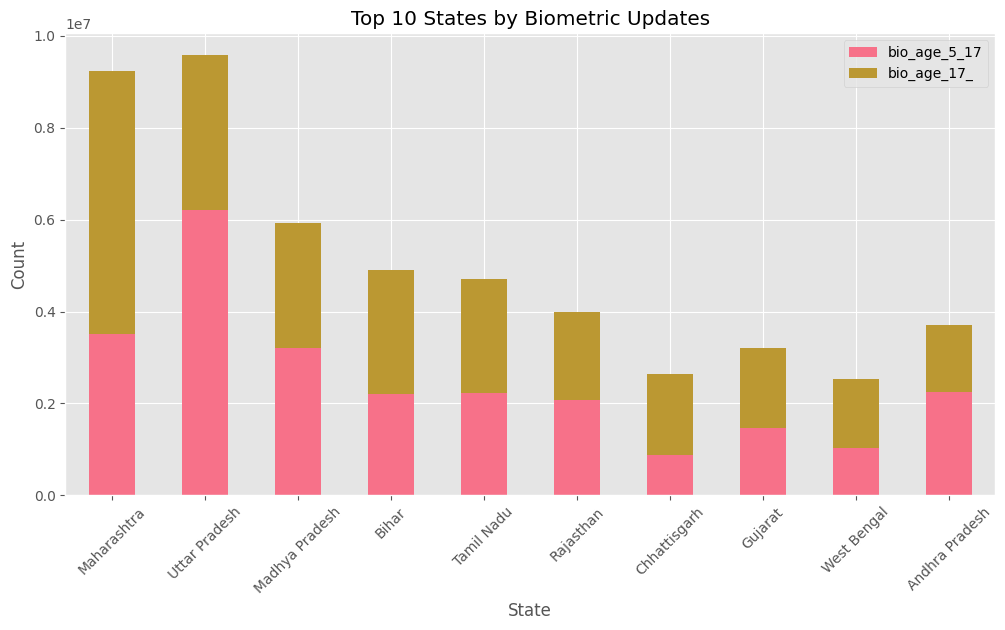

In [7]:
# Biometric Updates by State
state_groups = df_bio.groupby('state')[['bio_age_5_17', 'bio_age_17_']].sum().sort_values(by='bio_age_17_', ascending=False).head(10)

state_groups.plot(kind='bar', figsize=(12, 6), stacked=True)
plt.title('Top 10 States by Biometric Updates')
plt.ylabel('Count')
plt.xlabel('State')
plt.xticks(rotation=45)
plt.show()

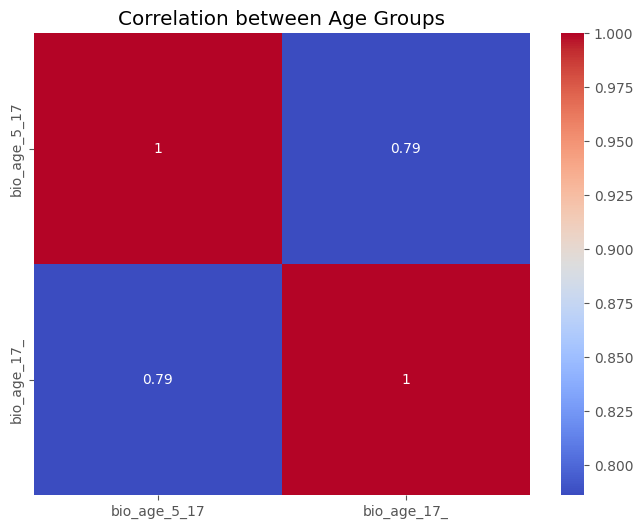

In [8]:
# Correlation Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df_bio[['bio_age_5_17', 'bio_age_17_']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation between Age Groups')
plt.show()

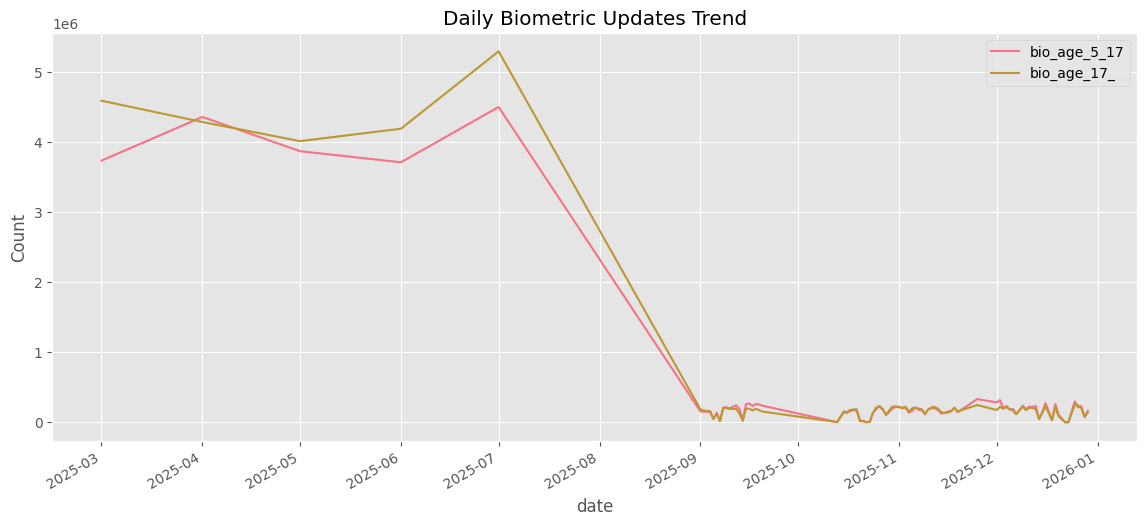

In [9]:
# Time Series Analysis
daily_trend = df_bio.groupby('date')[['bio_age_5_17', 'bio_age_17_']].sum()
daily_trend.plot(figsize=(14, 6))
plt.title('Daily Biometric Updates Trend')
plt.ylabel('Count')
plt.show()